In [2]:
import os

import torch

# neural network:
from torch import nn
# optimizer:
from torch import optim

import matplotlib.pyplot as plt

In [3]:
#----------------------------------------

trainingSetX = torch.tensor([
    [
        [1, 1, 1],
        [1, 0, 1],
        [1, 1, 1]
    ],
    [
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]
    ],
    [
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]
    ],
    [
        [1, 0, 1],
        [0, 1, 0],
        [1, 0, 1]
    ]
], dtype=torch.float).reshape(4, 9)
# inputs: 4 rijen (blokken) met elk een kolommen van 9 

#----------------------------------------

trainingSetY = torch.tensor([
    [0],
    [0],
    [1],
    [1]
], dtype=torch.float)
# outputs: 2 x rondje en 2 x kruisje

#----------------------------------------

testSetX = torch.tensor([
    [
        [0, 1, 1],
        [1, 0, 1],
        [1, 1, 0]
    ],
    [
        [1, 0, 1],
        [1, 0, 1],
        [1, 1, 0]
    ],
    [
        [1, 0, 1],
        [0, 0, 0],
        [1, 0, 1]
    ],
    [
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]
    ],
    [
        [1, 0, 0],
        [1, 1, 1],
        [0, 0, 1]
    ],
    [
        [0, 0, 1],
        [1, 1, 1],
        [1, 0, 0]
    ],
    [
        [0, 0, 0],
        [1, 1, 1],
        [0, 0, 0]
    ],
    [
        [1, 0, 0],
        [1, 1, 0],
        [1, 0, 0]
    ]
], dtype=torch.float).reshape(8, 9)

#----------------------------------------

testSetY = torch.tensor([
    [0],
    [0],
    [0],
    [0],
    [1],
    [1],
    [1],
    [1]
], dtype=torch.float)

#----------------------------------------

print(trainingSetX.shape)
print(trainingSetY.shape)

#----------------------------------------

print(testSetX.shape)
print(testSetY.shape)

#----------------------------------------

torch.Size([4, 9])
torch.Size([4, 1])
torch.Size([8, 9])
torch.Size([8, 1])


In [5]:
#----------------------------------------
# mps is de cuda voor de mac

device = (

    "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

)

#----------------------------------------

print(f"Using {device} device")

#----------------------------------------

Using cuda device


In [8]:
#----------------------------------------
# https://pytorch.org/docs/stable/nn.html voor uitleg
# https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module

class CrossCircleDetector(nn.Module):
    
    def __init__(self, inputs, outputs):
        
        super().__init__()
        
        # Simple linear connections
        self.inOut = nn.Linear(inputs, outputs)
        
        # Sigmoid squishification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        
        return self.sigmoid(self.inOut(x))
# Dit werkt met Sigmoid, omdat je een enkele output hebt. Zou je nog een driehoekje willen detecteren dan heb je 3 outputs nodig volgens (1,0,0) (0,1,0)(0,0,1), dan heb je softmax nodig. Sigmoid is een 1-dimensionale softmax
#----------------------------------------

CrossCircleDetector(
  (inOut): Linear(in_features=9, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


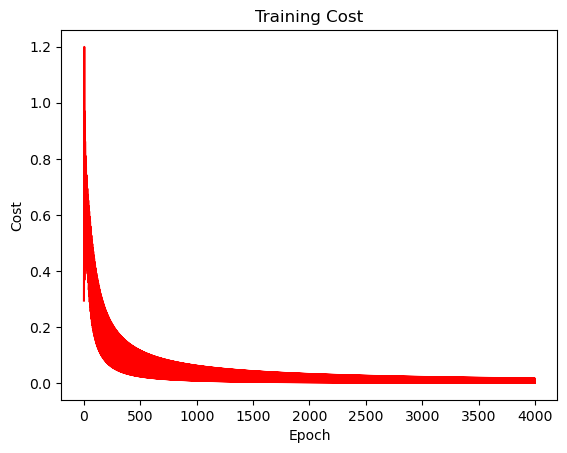

In [22]:
#----------------------------------------

epochs = 1000

learningRate = 0.1

#----------------------------------------

# Simplest possible network: 9 inputs and 1 output (binary: 0 when < 0.5 and 1 when > 0.5)
# als precies 0.5 dan een onbekende uitkomst. Dat grijze gebeid komt niet voor in de data. 
model = CrossCircleDetector(9, 1)

print(model)

#----------------------------------------

losses = []

# Take binary cross entropy loss as loss function (one output interpreted as binary)
lossFunction = nn.BCELoss()

# Use stochastic gradient descent as optimizer, use weights and biases of model
gradientDescent = torch.optim.SGD(model.parameters(), lr=learningRate)
# gradientDescent = optim.SGD(model.parameters(), lr=learningRate) werkt ook, omdat je hem al los hebt geimporteerd.
# alle opties: https://pytorch.org/docs/stable/optim.html
# momentum is om leerproces te versnellen

# gradientDescent = torch.optim.RMSprop(model.parameters(), lr=learningRate)
# geeft betere resultaten

#----------------------------------------

for i in range(epochs):
    
    for x, y in zip(trainingSetX, trainingSetY):
    
        # Reset the gradient delta's (dw, db)
        # oftewel: begin bij het begin
        gradientDescent.zero_grad()

        # Forward step
        yhat = model(x)

        # Compute loss
        loss = lossFunction(yhat, y)

        # Keep track of loss
        losses.append(loss.item())

        # Apply gradient descent (via backpropagation)
        loss.backward()

        # Use w += -step * dw * learnRate
        # hier update je je model, bij optim.SGD maak je de koppeling tussen je model en gradient descent.
        gradientDescent.step()

#----------------------------------------

fig, ax = plt.subplots()
ax.set(xlabel='Epoch', ylabel='Cost', title="Training Cost")

plt.plot([x for x in range(4 * epochs)], losses, 'red')
plt.show()

#----------------------------------------

In [18]:
#----------------------------------------

# Let's compare
for x, y in zip(testSetX, testSetY):

    print(f"actual: {round(y.item())}, predicted: {model(x).item()}, rounded: {round(model(x).item())}")
    
#----------------------------------------

actual: 0, predicted: 0.0013850306859239936, rounded: 0
actual: 0, predicted: 0.002874304074794054, rounded: 0
actual: 0, predicted: 0.10800451785326004, rounded: 0
actual: 0, predicted: 0.004745303653180599, rounded: 0
actual: 1, predicted: 0.998910665512085, rounded: 1
actual: 1, predicted: 0.9989637136459351, rounded: 1
actual: 1, predicted: 0.9996984004974365, rounded: 1
actual: 1, predicted: 0.9998204112052917, rounded: 1


In [14]:
# Conclusie: 100% nauwkeurig. De 3e vind het model het lastigst.

In [19]:
# de 1e tensor geeft de gewichten
# de 2 tensor geeft de bias

for p in model.parameters():
    print(p.data)

tensor([[-0.4876, -1.2192, -0.6031, -1.3866, 10.7220, -1.6379, -0.6317, -1.5105,
         -0.7972]])
tensor([0.4083])


In [ ]:
tensor([[-0.6427, -1.0005, -0.4469, -1.3789,  8.0912, -0.8799, -0.4088, -1.3273,
         -0.5350]])
tensor([0.5415])